In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'sigmoid', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 95s 2ms/step - loss: 0.6714 - accuracy: 0.0076 - val_loss: 0.6367 - val_accuracy: 0.0116
Epoch 2/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.6309 - accuracy: 0.0114 - val_loss: 0.6233 - val_accuracy: 0.0118
Epoch 3/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6194 - accuracy: 0.0116 - val_loss: 0.6171 - val_accuracy: 0.0119
Epoch 4/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6151 - accuracy: 0.0117 - val_loss: 0.6166 - val_accuracy: 0.0119
Epoch 5/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6126 - accuracy: 0.0117 - val_loss: 0.6120 - val_accuracy: 0.0119
Epoch 6/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6107 - accuracy: 0.0118 - val_loss: 0.6097 - val_accuracy: 0.0119
Epoch 7/50
50000/50000 [==============================] - 81s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [19]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [20]:
encoded_test_data.shape

(10000, 128)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [22]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [23]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RSADB.csv', index = False)

In [24]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : frog


In [25]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 6


In [26]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [27]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [28]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
41,6,frog,0.000000,13.863720,0.802760,0.000000,0.000000,3.424074,0.846446,0.000000,...,0.774727,14.569914,2.901970,0.000000,5.029751,1.577814,4.518776,2.679219,1.000000,0.000000
8449,1,automobile,0.293035,16.431942,1.372857,0.000000,0.000000,3.644723,0.399363,0.000000,...,2.783938,21.222769,3.727011,0.000000,1.903015,1.460941,1.090454,1.684360,0.974936,0.025064
1071,6,frog,0.000000,13.552792,0.460694,0.000000,0.000000,3.523868,1.741151,0.370211,...,2.338729,10.798350,3.637937,0.000000,5.375542,0.000000,1.933684,3.021995,0.970522,0.029478
4047,4,deer,0.141074,12.120668,0.947726,0.000000,0.000000,3.260887,0.519937,0.000000,...,1.917259,13.865302,2.807106,0.000000,1.784269,2.379226,1.658577,0.940596,0.969055,0.030945
9246,3,cat,0.005800,17.989202,1.418539,0.000000,0.000000,4.373725,0.883776,0.000000,...,0.000000,19.656414,4.012126,0.000000,6.216360,3.566635,6.783691,5.591241,0.964376,0.035624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0,airplane,0.000000,0.000000,0.000000,8.677698,1.712448,0.000000,0.000000,1.896799,...,1.915596,0.000000,0.000000,14.290994,0.000000,0.223378,0.000000,2.979144,0.045029,0.954971
8960,0,airplane,0.000000,0.000000,0.000000,12.969172,4.555241,0.000000,0.000000,1.278741,...,1.651322,0.000000,0.000000,17.709850,0.885022,0.000000,0.250143,1.258467,0.044416,0.955584
6970,0,airplane,0.000000,0.000000,0.000000,8.994217,3.346420,0.000000,0.000000,0.878223,...,1.218419,0.000000,0.000000,16.139420,0.377928,0.789741,0.417899,1.477848,0.043480,0.956520
447,0,airplane,0.000000,0.000000,0.000000,9.048850,1.931062,0.000000,0.000000,1.809662,...,1.899275,0.000000,0.000000,15.172041,0.000000,0.235569,0.000000,2.339184,0.040244,0.959756


In [29]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

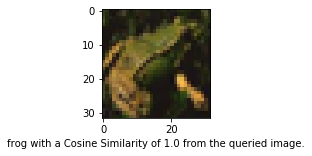

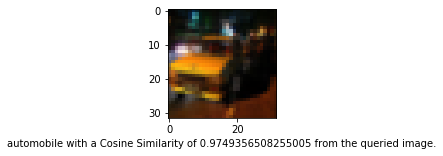

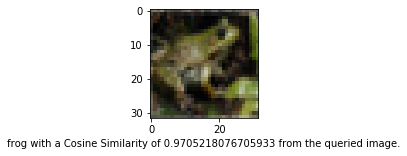

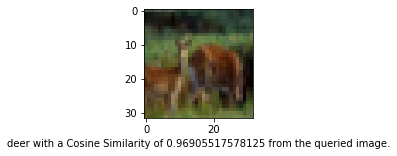

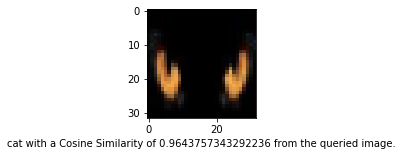

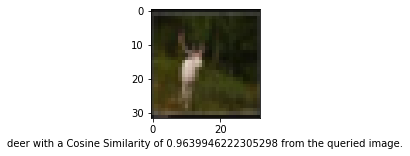

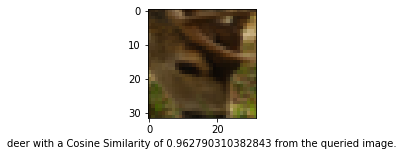

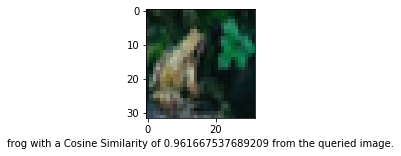

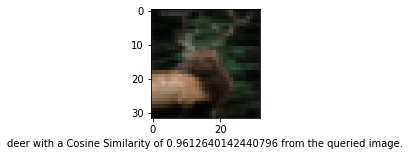

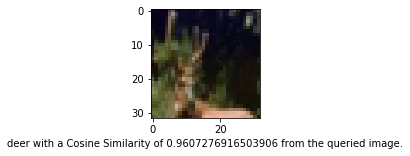

In [30]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [31]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [32]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
41,6,frog,0.000000,13.863720,0.802760,0.000000,0.000000,3.424074,0.846446,0.000000,...,14.569914,2.901970,0.000000,5.029751,1.577814,4.518776,2.679219,1.000000,0.000000,0.000000
1071,6,frog,0.000000,13.552792,0.460694,0.000000,0.000000,3.523868,1.741151,0.370211,...,10.798350,3.637937,0.000000,5.375542,0.000000,1.933684,3.021995,0.970522,0.029478,13.626858
5193,4,deer,0.022678,11.788282,1.026890,0.000000,0.000000,2.651341,0.427548,0.000000,...,12.429004,2.808132,0.000000,3.650672,0.969824,1.135286,1.814344,0.962790,0.037210,15.205142
2772,6,frog,0.061131,9.035603,0.387884,0.000000,0.000000,2.475622,0.718493,0.000000,...,16.631159,2.664908,0.000000,0.370315,3.171424,1.440617,2.361546,0.959726,0.040274,15.804427
8416,6,frog,0.175346,13.798602,0.888369,0.000000,0.000000,3.453329,0.637449,0.000000,...,18.041349,2.825019,0.000000,0.000000,3.061740,1.680905,2.356491,0.961668,0.038332,15.847080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,0,airplane,0.000000,0.000000,0.000000,16.224756,5.392663,0.000000,0.000000,1.341671,...,0.000000,0.000000,21.571804,2.477021,0.165765,0.000000,2.289730,0.073283,0.926717,95.093272
3823,0,airplane,0.000000,0.000000,0.000000,16.152487,5.371860,0.000000,0.000000,1.332911,...,0.000000,0.000000,22.217569,3.149913,0.040619,0.699094,1.285229,0.067318,0.932682,95.299239
8903,0,airplane,0.000000,0.000000,0.000000,16.209860,5.390234,0.000000,0.000000,1.340758,...,0.000000,0.000000,22.091120,2.786050,0.065830,0.311560,1.486320,0.056793,0.943207,95.430659
7803,0,airplane,0.000000,0.000000,0.000000,16.155567,5.380467,0.000000,0.000000,1.330074,...,0.000000,0.552971,20.609818,3.246747,0.710761,1.309961,2.029190,0.063431,0.936569,97.668996


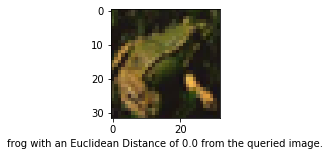

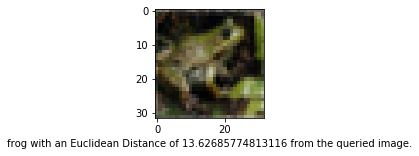

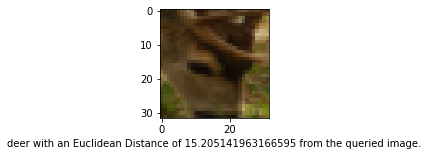

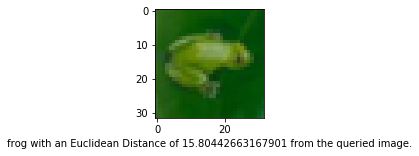

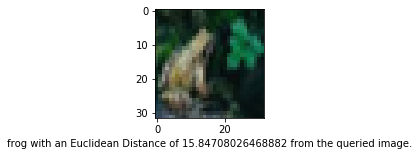

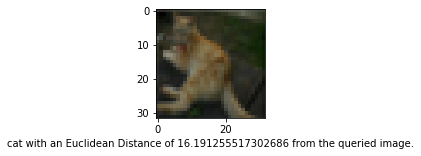

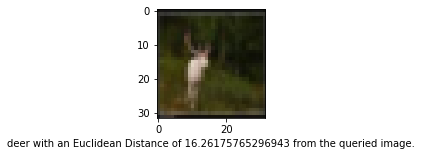

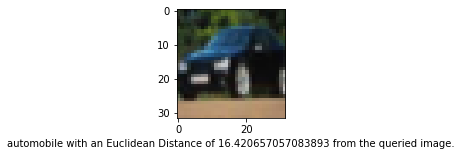

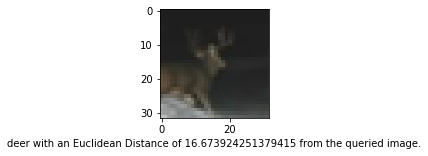

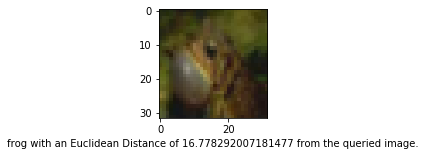

In [33]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()